# INORE OpenFAST Workshop

In [21]:
import pandas as pd
import os, glob, shutil
import numpy as np
import sys, math  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.colors as mcolors
from matplotlib.ticker import LinearLocator
from matplotlib import cm
plt.rcParams['axes.grid'] = True

In [22]:
## PSD function

def psdsignal(time,sensor):
    #Frequency vector
    dfFFT=1/(np.max(time)-np.min(time))
    fFFTlength = len(time)
    fFFT = np.linspace(0,dfFFT*(fFFTlength-1),fFFTlength)
    # Power spectral density
    psd = 2*(1/fFFTlength)*np.abs(np.fft.fft(sensor))**2
    return psd,fFFT

## OC4 DeepCWind / NREL 5 MW - Wind Turbine 

In [23]:
## Load main output file

path = "C:/Users/pwiley/Desktop/INORE/OpenFAST_Files_win/OpenFAST_Files_win/Floating_5MW_Input_Files/"
basename = "5MW_OC4Semi_WSt_WavesWN"

OF = pd.read_csv(path+basename+".out",skiprows=[0,1,2,3,4,5,7],sep='\t')
OF.columns

Index(['Time', 'Wind1VelX', 'Wind1VelY', 'Wind1VelZ', 'Azimuth', 'RotSpeed',
       'GenSpeed', 'OoPDefl1', 'IPDefl1', 'TwstDefl1', 'BldPitch1', 'TTDspFA',
       'TTDspSS', 'TTDspTwst', 'PtfmSurge', 'PtfmSway', 'PtfmHeave',
       'PtfmRoll', 'PtfmPitch', 'PtfmYaw', 'RootFxc1', 'RootFyc1', 'RootFzc1',
       'RootMxc1', 'RootMyc1', 'RootMzc1', 'RotTorq', 'LSSGagMya', 'LSSGagMza',
       'YawBrFxp', 'YawBrFyp', 'YawBrFzp', 'YawBrMxp', 'YawBrMyp', 'YawBrMzp',
       'TwrBsFxt', 'TwrBsFyt', 'TwrBsFzt', 'TwrBsMxt', 'TwrBsMyt', 'TwrBsMzt',
       'RtArea', 'B1N3Clrnc', 'B2N3Clrnc', 'B3N3Clrnc', 'GenPwr', 'GenTq',
       'Wave1Elev', 'HydroFxi', 'HydroFyi', 'HydroFzi', 'HydroMxi', 'HydroMyi',
       'HydroMzi', 'B1Surge', 'B1Sway', 'B1Heave', 'B1Roll', 'B1Pitch',
       'B1Yaw', 'B1TVxi', 'B1TVyi', 'B1TVzi', 'B1RVxi', 'B1RVyi', 'B1RVzi',
       'B1TAxi', 'B1TAyi', 'B1TAzi', 'B1RAxi', 'B1RAyi', 'B1RAzi', 'B1WvsFxi',
       'B1WvsFyi', 'B1WvsFzi', 'B1WvsMxi', 'B1WvsMyi', 'B1WvsMzi', 'B1HDSFxi

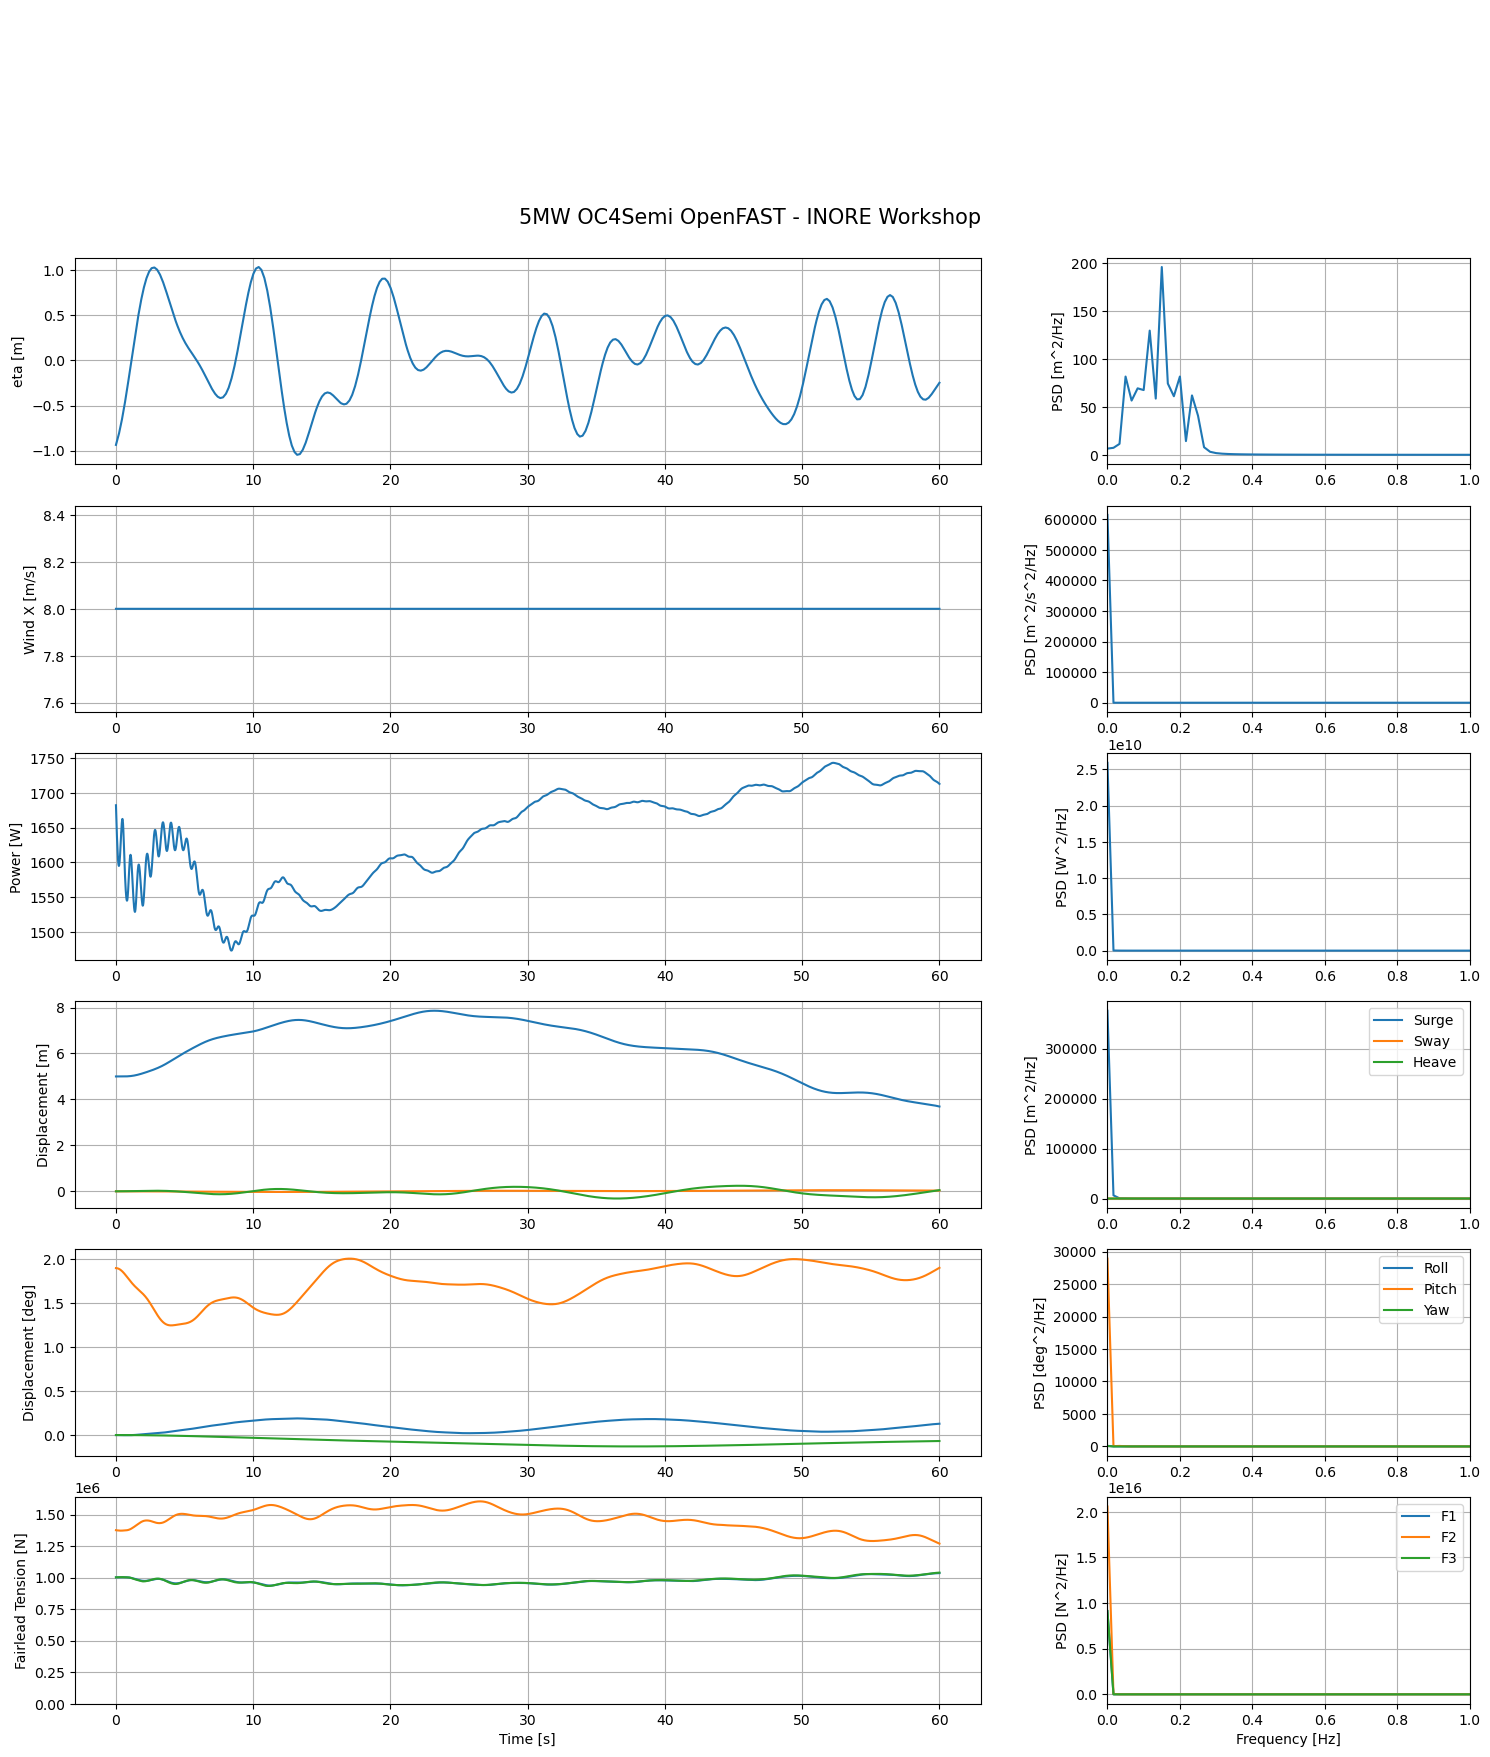

In [24]:
## Plot outputs

fig,axs = plt.subplots(7,2,figsize=(18,22), gridspec_kw={'width_ratios': [5, 2]})
axs = axs.flatten()
fig.suptitle("5MW OC4Semi OpenFAST - INORE Workshop",y=0.79,fontsize=15)
axs[0].axis('off'); axs[1].axis('off');
freqlim = [0,1]

# eta
axs[2].plot(OF.Time,OF.Wave1Elev)  
axs[2].set(ylabel='eta [m]')
[psd,fFFT] = psdsignal(OF.Time,OF.Wave1Elev)
axs[3].plot(fFFT,psd)
axs[3].set(ylabel='PSD [m^2/Hz]',xlim=freqlim)

# wind
axs[4].plot(OF.Time,OF.Wind1VelX)  
axs[4].set(ylabel='Wind X [m/s]')
[psd,fFFT] = psdsignal(OF.Time,OF.Wind1VelX)
axs[5].plot(fFFT,psd)
axs[5].set(ylabel='PSD [m^2/s^2/Hz]',xlim=freqlim)

# Power
axs[6].plot(OF.Time,OF.GenPwr) 
axs[6].set(ylabel='Power [W]')
fylim = 0
[psd,fFFT] = psdsignal(OF.Time,OF.GenPwr)
axs[7].plot(fFFT,psd)
axs[7].set(ylabel='PSD [W^2/Hz]',xlim=freqlim)

# Translations
axs[8].plot(OF.Time,OF.PtfmSurge,label='Surge')
axs[8].plot(OF.Time,OF.PtfmSway,label='Sway')
axs[8].plot(OF.Time,OF.PtfmHeave,label='Heave')   
axs[8].set(ylabel='Displacement [m]')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmSurge)
axs[9].plot(fFFT,psd,label='Surge')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmSway)
axs[9].plot(fFFT,psd,label='Sway')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmHeave)
axs[9].plot(fFFT,psd,label='Heave')
axs[9].set(ylabel='PSD [m^2/Hz]',xlim=freqlim)
axs[9].legend(loc=1)

# Rotations
axs[10].plot(OF.Time,OF.PtfmRoll,label='Roll')
axs[10].plot(OF.Time,OF.PtfmPitch,label='Pitch')
axs[10].plot(OF.Time,OF.PtfmYaw,label='Yaw')   
axs[10].set(ylabel='Displacement [deg]')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmRoll);  
axs[11].plot(fFFT,psd,label='Roll')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmPitch); 
axs[11].plot(fFFT,psd,label='Pitch')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmYaw); 
axs[11].plot(fFFT,psd,label='Yaw')
axs[11].set(ylabel='PSD [deg^2/Hz]',xlim=freqlim)
axs[11].legend(loc=1)

# Mooring Tension
axs[12].plot(OF.Time,OF.FAIRTEN1,label='F1')
axs[12].plot(OF.Time,OF.FAIRTEN2,label='F2')
axs[12].plot(OF.Time,OF.FAIRTEN3,label='F3')
axs[12].set(ylabel='Fairlead Tension [N]',xlabel='Time [s]')
axs[12].set_ylim(bottom=0)
[psd,fFFT] = psdsignal(OF.Time,OF.FAIRTEN1); 
axs[13].plot(fFFT,psd,label='F1')
[psd,fFFT] = psdsignal(OF.Time,OF.FAIRTEN2); 
axs[13].plot(fFFT,psd,label='F2')
[psd,fFFT] = psdsignal(OF.Time,OF.FAIRTEN3); 
axs[13].plot(fFFT,psd,label='F3')
axs[13].set(ylabel='PSD [N^2/Hz]',xlabel='Frequency [Hz]',xlim=freqlim)
axs[13].legend(loc=1)

plt.show()                         

## Floating RM1 Quad - Marine Turbine

In [26]:
## Load main output file

path = "C:/Users/pwiley/Desktop/INORE/OpenFAST_Files_win/OpenFAST_Files_win/Floating_RM1_Input_Files/"
basename = "MHK_RM1_Floating"

OF = pd.read_csv(path+basename+".out",skiprows=[0,1,2,3,4,5,7],sep='\t')
list(OF.columns)

['Time',
 'PtfmSurge',
 'PtfmSway',
 'PtfmHeave',
 'PtfmRoll',
 'PtfmPitch',
 'PtfmYaw',
 'TwrTpTDxi',
 'TwrTpTDyi',
 'TwrTpTDzi',
 'OoPDefl1',
 'TwN1Fbx',
 'TwN3Fby',
 'TwN4Fbz',
 'TwN1Mbx',
 'TwN2Mby',
 'TwN3Mbz',
 'B2N4Fbn',
 'B1N7Fbt',
 'B2N8Fbs',
 'B1N2Mbn',
 'B2N3Mbt',
 'B1N6Mbs',
 'B1FldFz',
 'B2FldMx',
 'HbFbx',
 'HbFby',
 'HbFbz',
 'HbMbx',
 'HbMby',
 'HbMbz',
 'NcFbx',
 'NcFby',
 'NcFbz',
 'NcMbx',
 'NcMby',
 'NcMbz',
 'RtFldFxh',
 'RtFldFyh',
 'RtFldFzg',
 'RtFldMxh',
 'RtFldMyg',
 'RtFldMzh',
 'B1N3SigCr',
 'B2N5SigCr',
 'B1N2SgCav',
 'B2N6SgCav',
 'Wave1Elev',
 'HydroFxi',
 'HydroFyi',
 'HydroFzi',
 'FAIRTEN1',
 'FAIRTEN2',
 'FAIRTEN3',
 'FAIRTEN4',
 'FAIRTEN5',
 'FAIRTEN6',
 'ANCHTEN1',
 'ANCHTEN2',
 'ANCHTEN3',
 'ANCHTEN4',
 'ANCHTEN5',
 'ANCHTEN6',
 'P1FX',
 'P1FY',
 'P1FZ',
 'P2FX',
 'P2FY',
 'P2FZ',
 'P3FX',
 'P3FY',
 'P3FZ',
 'P4FX',
 'P4FY',
 'P4FZ',
 'P5FX',
 'P5FY',
 'P5FZ',
 'P6FX',
 'P6FY',
 'P6FZ',
 'P7FX',
 'P7FY',
 'P7FZ',
 'P7PX',
 'P7PY',
 'P7PZ',
 'P8FX',


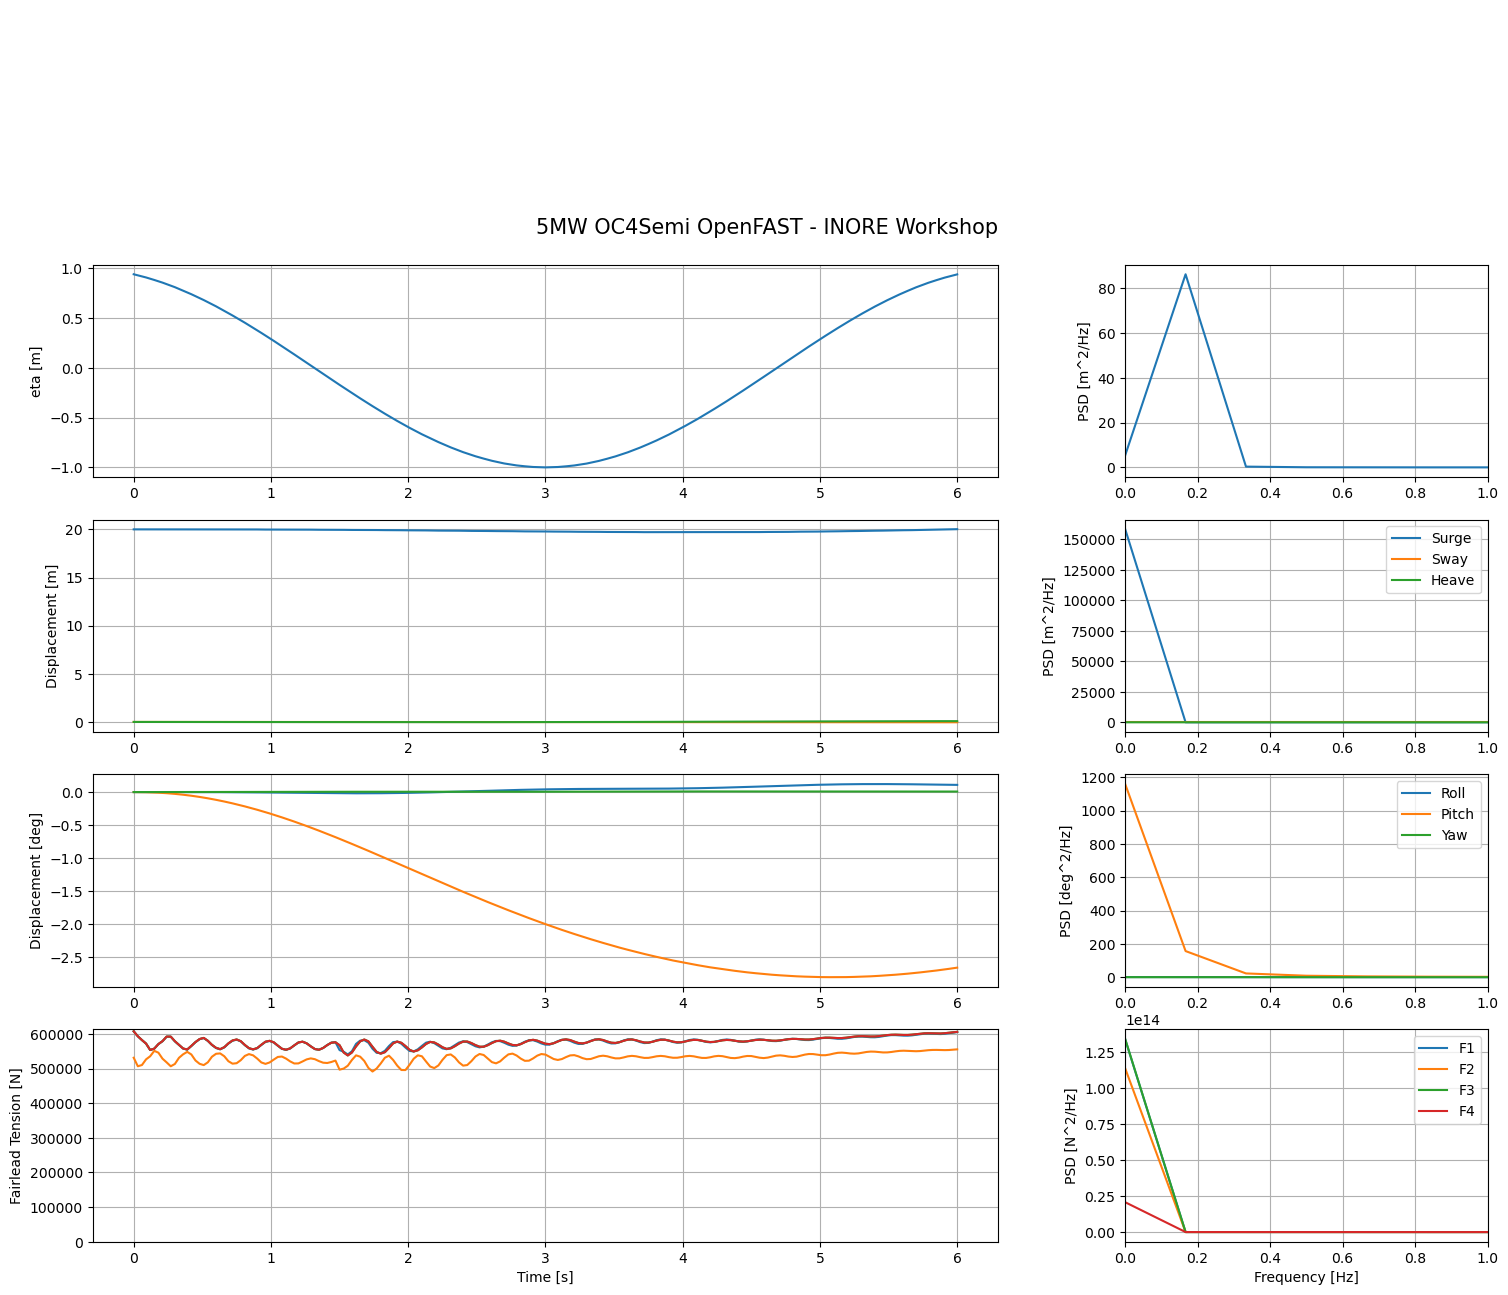

In [27]:
## Plot outputs

fig,axs = plt.subplots(5,2,figsize=(18,16), gridspec_kw={'width_ratios': [5, 2]})
axs = axs.flatten()
fig.suptitle("5MW OC4Semi OpenFAST - INORE Workshop",y=0.75,fontsize=15)
axs[0].axis('off'); axs[1].axis('off');
freqlim = [0,1]

# eta
axs[2].plot(OF.Time,OF.Wave1Elev)  
axs[2].set(ylabel='eta [m]')
[psd,fFFT] = psdsignal(OF.Time,OF.Wave1Elev)
axs[3].plot(fFFT,psd)
axs[3].set(ylabel='PSD [m^2/Hz]',xlim=freqlim)

# Translations
axs[4].plot(OF.Time,OF.PtfmSurge,label='Surge')
axs[4].plot(OF.Time,OF.PtfmSway,label='Sway')
axs[4].plot(OF.Time,OF.PtfmHeave,label='Heave')   
axs[4].set(ylabel='Displacement [m]')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmSurge)
axs[5].plot(fFFT,psd,label='Surge')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmSway)
axs[5].plot(fFFT,psd,label='Sway')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmHeave)
axs[5].plot(fFFT,psd,label='Heave')
axs[5].set(ylabel='PSD [m^2/Hz]',xlim=freqlim)
axs[5].legend(loc=1)

# Rotations
axs[6].plot(OF.Time,OF.PtfmRoll,label='Roll')
axs[6].plot(OF.Time,OF.PtfmPitch,label='Pitch')
axs[6].plot(OF.Time,OF.PtfmYaw,label='Yaw')   
axs[6].set(ylabel='Displacement [deg]')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmRoll);  
axs[7].plot(fFFT,psd,label='Roll')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmPitch); 
axs[7].plot(fFFT,psd,label='Pitch')
[psd,fFFT] = psdsignal(OF.Time,OF.PtfmYaw); 
axs[7].plot(fFFT,psd,label='Yaw')
axs[7].set(ylabel='PSD [deg^2/Hz]',xlim=freqlim)
axs[7].legend(loc=1)

# Mooring Tension
axs[8].plot(OF.Time,OF.FAIRTEN1,label='F1')
axs[8].plot(OF.Time,OF.FAIRTEN2,label='F2')
axs[8].plot(OF.Time,OF.FAIRTEN3,label='F3')
axs[8].plot(OF.Time,OF.FAIRTEN3,label='F4')
axs[8].set(ylabel='Fairlead Tension [N]',xlabel='Time [s]')
axs[8].set_ylim(bottom=0)
[psd,fFFT] = psdsignal(OF.Time,OF.FAIRTEN1); 
axs[9].plot(fFFT,psd,label='F1')
[psd,fFFT] = psdsignal(OF.Time,OF.FAIRTEN2); 
axs[9].plot(fFFT,psd,label='F2')
[psd,fFFT] = psdsignal(OF.Time,OF.FAIRTEN3); 
axs[9].plot(fFFT,psd,label='F3')
[psd,fFFT] = psdsignal(OF.Time,OF.FAIRTEN4); 
axs[9].plot(fFFT,psd,label='F4')
axs[9].set(ylabel='PSD [N^2/Hz]',xlabel='Frequency [Hz]',xlim=freqlim)
axs[9].legend(loc=1)

plt.show() 